<a href="https://colab.research.google.com/github/NileeshaDM/Google-Colabs/blob/main/Dealsize_Prediction_from_Market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import seaborn as sb
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from tensorflow import keras

##Data Preparation

###Load Dataset

In [ ]:
market_data = pd.read_csv('/content/Market_data_set.csv')
market_data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium


In [ ]:
#getting some information about the data
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  Product_SK       2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  Customer_SK      2823 non-null   int64  
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 330.9+ KB


In [ ]:
#info about categorical data
market_data.describe(include = 'O')

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE
count,2823,2823,2823,2823,2823
unique,6,7,109,19,3
top,Shipped,Classic Cars,S18_3232,USA,Medium
freq,2617,967,52,1004,1384


###Data Preprocessing

####Handle missing values

In [ ]:
market_data.dropna(inplace=True)
market_data.shape

(2823, 15)

In [ ]:
market_data.isnull().sum()  #no missing values

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
Product_SK         0
PRODUCTCODE        0
Customer_SK        0
COUNTRY            0
DEALSIZE           0
dtype: int64

#### Checking for Duplicate Data

In [ ]:
duplicates = market_data[market_data.duplicated()]
duplicates.shape #no duplicate values

(0, 15)

####Checking for Data Imbalance

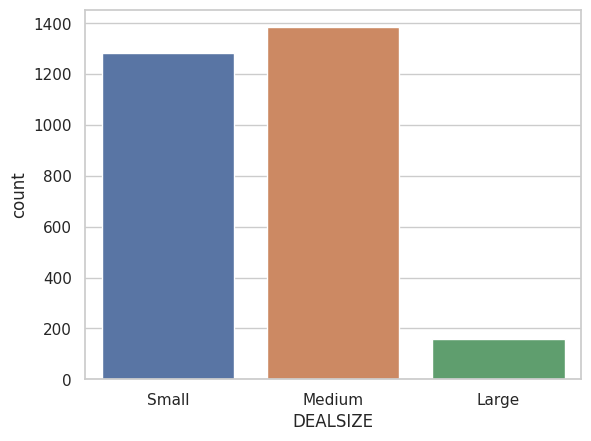

In [ ]:
sb.set_theme(style="whitegrid")
sb.countplot(data=market_data, x='DEALSIZE')
plt.show()

####Encoding Categorical Features

In [ ]:
label_encode = LabelEncoder()
market_data['DEALSIZE'] = label_encode.fit_transform(market_data['DEALSIZE'])

categorical_columns = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY']

for column in categorical_columns:
  market_data = pd.get_dummies(market_data, columns=[column])

# for column in categorical_columns:
#     label_encoder = LabelEncoder()
#     market_data[column] = label_encoder.fit_transform(market_data[column])

In [ ]:
# print(market_data['STATUS'].unique())
# print(market_data['PRODUCTLINE'].unique())
# print(market_data['PRODUCTCODE'].unique())
# print(market_data['COUNTRY'].unique())
# print(market_data['DEALSIZE'].unique())

####Scaling Numerical Data

In [ ]:
# Scale numerical features if necessary
numerical_columns = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP', 'Product_SK', 'Customer_SK']
scaler = StandardScaler()
market_data[numerical_columns] = scaler.fit_transform(market_data[numerical_columns])

market_data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Product_SK,Customer_SK,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.142246,-1.731437,-1.731437,...,0,0,0,0,0,0,0,0,0,1
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.142246,-1.730210,-1.730210,...,0,0,0,0,0,0,0,0,0,0
2,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.142246,-1.728983,-1.728983,...,0,0,0,0,0,0,0,0,0,0
3,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.142246,-1.727756,-1.727756,...,0,0,0,0,0,0,0,0,0,1
4,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.142246,-1.726529,-1.726529,...,0,0,0,0,0,0,0,0,0,1


#### Seperating Independent and Dependent Variables

In [ ]:
# Shuffle the dataset
market_data = shuffle(market_data, random_state=42)

In [ ]:
X = market_data.drop('DEALSIZE', axis=1)
y = market_data['DEALSIZE']

#### Handling Data Imbalance with Smote

In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape using smote {}'.format(Counter(y_smote)))

Original dataset shape Counter({1: 1384, 2: 1282, 0: 157})
Resampled dataset shape using smote Counter({2: 1384, 1: 1384, 0: 1384})


####Splitting Data into Train and Test

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# Encode labels using to_categorical for multi-class classification
y_train_encoded = to_categorical(y_train, num_classes=3)
y_val_encoded = to_categorical(y_val, num_classes=3)

###Model Design

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

 ### Training

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=2)


Epoch 1/100
104/104 - 2s - loss: 0.7846 - accuracy: 0.6637 - val_loss: 0.5018 - val_accuracy: 0.8147 - 2s/epoch - 17ms/step
Epoch 2/100
104/104 - 1s - loss: 0.4052 - accuracy: 0.8540 - val_loss: 0.2654 - val_accuracy: 0.9146 - 720ms/epoch - 7ms/step
Epoch 3/100
104/104 - 0s - loss: 0.2561 - accuracy: 0.9061 - val_loss: 0.1804 - val_accuracy: 0.9386 - 247ms/epoch - 2ms/step
Epoch 4/100
104/104 - 0s - loss: 0.1830 - accuracy: 0.9310 - val_loss: 0.1393 - val_accuracy: 0.9471 - 254ms/epoch - 2ms/step
Epoch 5/100
104/104 - 0s - loss: 0.1412 - accuracy: 0.9458 - val_loss: 0.1184 - val_accuracy: 0.9579 - 234ms/epoch - 2ms/step
Epoch 6/100
104/104 - 0s - loss: 0.1284 - accuracy: 0.9521 - val_loss: 0.1018 - val_accuracy: 0.9603 - 273ms/epoch - 3ms/step
Epoch 7/100
104/104 - 0s - loss: 0.1098 - accuracy: 0.9618 - val_loss: 0.0942 - val_accuracy: 0.9651 - 270ms/epoch - 3ms/step
Epoch 8/100
104/104 - 0s - loss: 0.0980 - accuracy: 0.9654 - val_loss: 0.0879 - val_accuracy: 0.9699 - 355ms/epoch - 3ms

### Evaluation

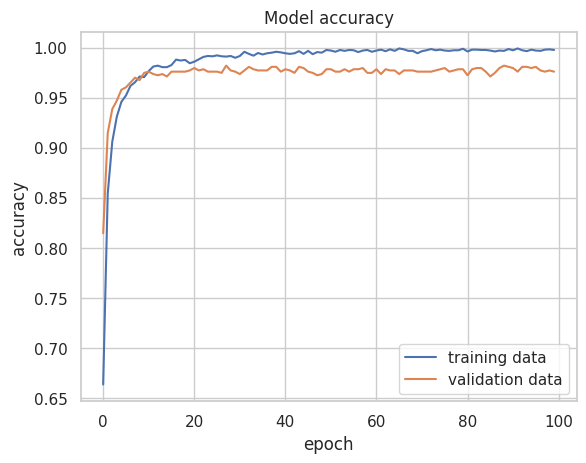

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

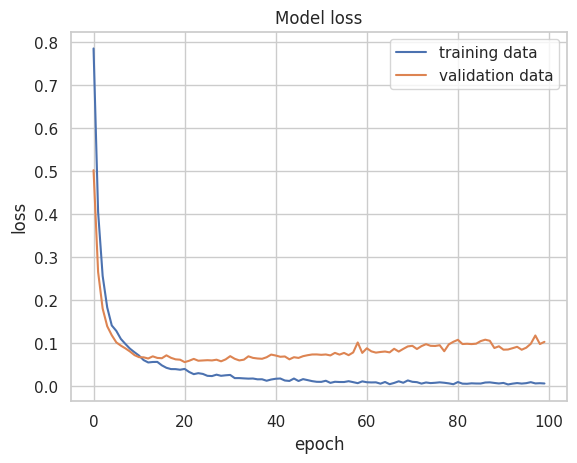

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_encoded)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


26/26 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9759
Validation Loss: 0.10307805240154266, Validation Accuracy: 0.9759325981140137


#### Classification Report

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(i) for i in y_pred]

print(classification_report(y_val, y_pred_classes))

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       259
           1       0.96      0.97      0.96       273
           2       0.98      0.97      0.97       299

    accuracy                           0.98       831
   macro avg       0.98      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831

